#### Q 5.1:
Using crime data from the file uscrime.txt (http://www.statsci.org/data/general/uscrime.txt, description at http://www.statsci.org/data/general/uscrime.html), test to see whether there are any outliers in the last column (number of crimes per 100,000 people). Use the grubbs.test function in the outliers package in R.

In [1]:
#Installing library
install.packages('outliers')
library(outliers)

#Reading the US crime list
UScrime <- read.delim("http://www.statsci.org/data/general/uscrime.txt",header=T)

#Apply the Grubbs test to the Crime column of the UScrime. I used type 11 to detect two outliers in the opposite sides of the 
grubbs.test(UScrime$Crime,type = 11)

package 'outliers' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ashka\AppData\Local\Temp\Rtmpm8FAzg\downloaded_packages



	Grubbs test for two opposite outliers

data:  UScrime$Crime
G = 4.26877, U = 0.78103, p-value = 1
alternative hypothesis: 342 and 1993 are outliers


### Q6.1:
Describe a situation or problem from your job, everyday life, current events, etc., for which a Change Detection model would be appropriate. Applying the CUSUM technique, how would you choose the critical value and the threshold?

### Answer to Q6.1:
I am working in a IoT solution for the agriculture tech industry and I am using anomaly detection for detecting the deterioraation of the agriculture products when the products are kept in the silo for a long time. The CUSUM algorithm can be used as one of the methods for detecting the deterioration of the agriculture products. The data source for the CUSUM could be the time series data which we receive from the IoT devices.

### Question 6.2_1
Using July through October daily-high-temperature data for `Atlanta` for 1996 through 2015, use a CUSUM approach to identify when unofficial summer ends (i.e., when the weather starts cooling off) each year. You can get the data that you need from the file temps.txt or online, for example at http://www.iweathernet.com/atlanta-weather-records or https://www.wunderground.com/history/airport/KFTY/2015/7/1/CustomHistory.html . You can use R if you’d like, but it’s straightforward enough that an Excel spreadsheet can easily do the job too.

In [2]:
Data_History <- read.delim(file = "C:/Users/ashka/Dropbox/GitHub/ISYE6501_Analytics_Modelling/HW3/temps.txt",header = T)

In [3]:
Data_Average <- rowMeans(x = Data_History[c(2:length(Data_History))])

In [4]:
#Calculate the mean of the total Data average
Data_Mean<- mean(Data_Average)
#One comparison index could be the difference between the 
Data_Deviation<-Data_Average-Data_Mean
#A constant can be selected to check the threshold we are going to consider 
# for the CUSUM method
C<-5
Data_Deviation_C<-Data_Deviation-C


In [5]:
Temp_Vector<-0*Data_Deviation_C
Cusum<-append(Temp_Vector,0)

In [12]:
# The following code goes through the calculated values in the 
# previous section and builds the CUSUM


for (i in 2:length(Data_Deviation_C))
{
    Temp<-Cusum[i]+Data_Deviation_C[i]    
    ifelse(Temp>0,Cusum[i+1]<-Temp,Cusum[i+1]<-0)
}

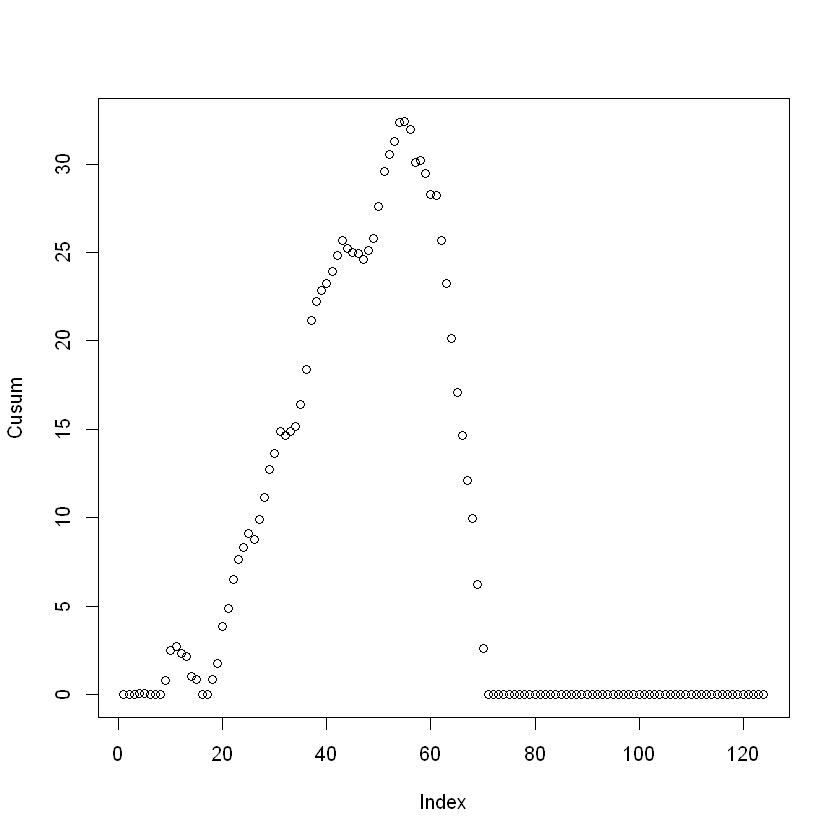

In [7]:
plot(Cusum)

In [8]:
#The following code finds the index of the maximum Cusum
Summer_Index<-match(max(Cusum),Cusum)
Summer_Ends<-Data_History$DAY[Summer_Index]

In [9]:
print(Summer_Ends)

[1] 24-Aug
123 Levels: 1-Aug 1-Jul 1-Oct 1-Sep 10-Aug 10-Jul 10-Oct 10-Sep ... 9-Sep


### Q6.2_2:
Use a CUSUM approach to make a judgment of whether Atlanta’s summer climate has gotten warmer in that time (and if so, when).


In [10]:
AUG_Data<-0*(length(Data_History[55,])-1)
                   
for (i in 2:length(Data_History[55,]))
    {
    AUG_Data[i]<-Data_History[55,i]
}


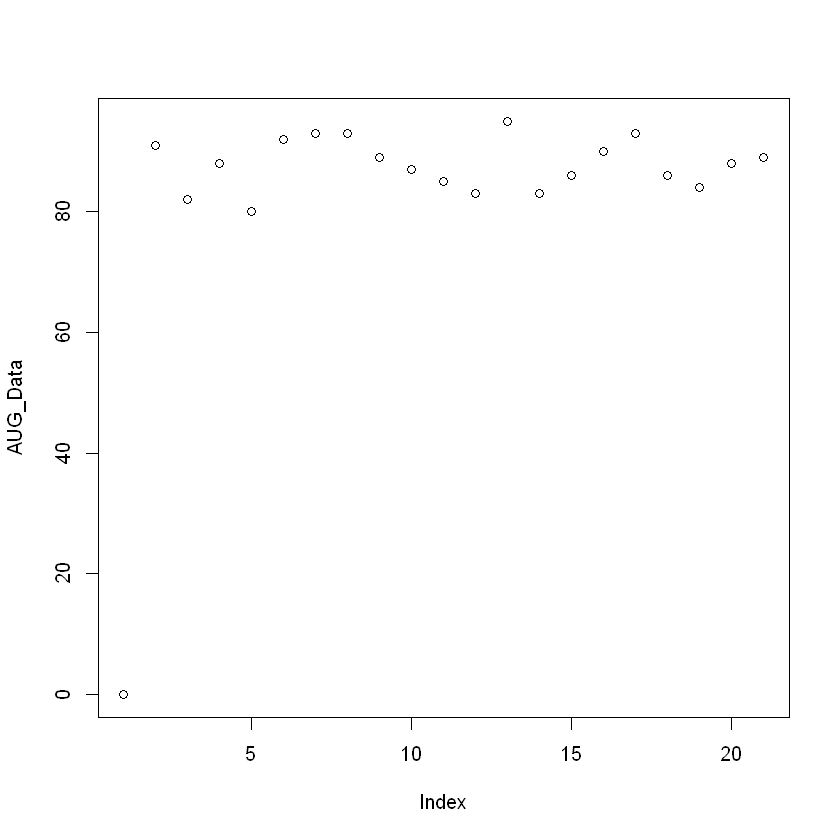

In [11]:
plot(AUG_Data)

The above figure does not show a consistent change in the temprature from 1996 to 2015.Considering the applied analysis, I can not consider that the calculated dummer end date is becoming warmer from 1996 to 2015.